In [1]:
import pandas as pd
from statsbombpy import sb

In [9]:
comps = sb.competitions()

comps = comps[(comps['competition_gender'] == 'male') & (comps['competition_international'] == True)
              & (comps['season_name'] > '2017') & (comps['country_name'] != 'Africa')]

comps

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
28,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-05-15T10:26:45.467818,2024-05-15T10:26:45.467818,2024-05-15T10:23:32.854925
29,43,3,International,FIFA World Cup,male,False,True,2018,2024-02-12T12:31:56.821876,2021-06-13T16:17:31.694,None,2024-02-12T12:31:56.821876
67,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [11]:
matches = pd.DataFrame()

for index, row in comps.iterrows():
    temp = sb.matches(row['competition_id'], row['season_id'])
    matches = pd.concat([matches, temp])
    
matches = matches[(matches['home_team'] == 'Poland') | (matches['away_team'] == 'Poland')]

matches

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2
26,3869152,2022-12-04,17:00:00.000,International - FIFA World Cup,2022,France,Poland,3,1,available,...,2023-06-18T15:31:37.811846,4,Round of 16,Al Thumama Stadium,Jesús Valenzuela Sáez,Didier Deschamps,Czesław Michniewicz,1.1.0,2,2
40,3857297,2022-11-26,15:00:00.000,International - FIFA World Cup,2022,Poland,Saudi Arabia,2,0,available,...,2023-04-27T00:19:40.857571,2,Group Stage,Education City Stadium,Wilton Pereira Sampaio,Czesław Michniewicz,Hervé Renard,1.1.0,2,2
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
13,7555,2018-06-24,20:00:00.000,International - FIFA World Cup,2018,Poland,Colombia,0,3,available,...,2021-06-13T16:17:31.694,2,Group Stage,Ak Bars Arena,César Arturo Ramos Palazuelos,Adam Nawałka,José Néstor Pekerman,1.0.2,None,None
15,7539,2018-06-19,17:00:00.000,International - FIFA World Cup,2018,Poland,Senegal,1,2,available,...,2021-06-13T16:17:31.694,1,Group Stage,Otkritie Bank Arena,Nawaf Abdulla Ghayyath Shukralla,Adam Nawałka,Aliou Cissé,1.0.2,None,None
49,7572,2018-06-28,16:00:00.000,International - FIFA World Cup,2018,Japan,Poland,0,1,available,...,2021-06-13T16:17:31.694,3,Group Stage,Volgograd Arena,Janny Sikazwe,Akira Nishino,Adam Nawałka,1.0.2,None,None
9,3788762,2021-06-19,21:00:00.000,Europe - UEFA Euro,2020,Spain,Poland,1,1,available,...,2022-08-04T12:00,2,Group Stage,Estadio de La Cartuja,Daniele Orsato,Luis Enrique Martínez García,Paulo Manuel Carvalho de Sousa,1.1.0,2,2
41,3788749,2021-06-14,18:00:00.000,Europe - UEFA Euro,2020,Poland,Slovakia,1,2,available,...,2023-04-27T22:35:08.658562,1,Group Stage,Saint-Petersburg Stadium,Ovidiu Alin Hațegan,Paulo Manuel Carvalho de Sousa,Štefan Tarkovič,1.1.0,2,2
48,3788776,2021-06-23,18:00:00.000,Europe - UEFA Euro,2020,Sweden,Poland,3,2,available,...,2022-08-04T12:00,3,Group Stage,Saint-Petersburg Stadium,Michael Oliver,Jan Olof Andersson,Paulo Manuel Carvalho de Sousa,1.1.0,2,2


In [203]:
df = sb.events(match_id=3857264, split=True, flatten_attrs=False)

df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


defaultdict(list,
            {'starting_xis':                                      id  index  period     timestamp  minute  \
             0  bad01947-5491-406e-bbe9-2a146161aa70      1       1  00:00:00.000       0   
             1  5b336aa1-8a01-4877-916f-4087379ac7bb      2       1  00:00:00.000       0   
             
                second         type  possession possession_team  play_pattern       team  \
             0       0  Starting XI           1          Poland  Regular Play     Poland   
             1       0  Starting XI           1          Poland  Regular Play  Argentina   
             
                duration                                            tactics  match_id  \
             0       0.0  {'formation': 442, 'lineup': [{'player': {'id'...   3857264   
             1       0.0  {'formation': 433, 'lineup': [{'player': {'id'...   3857264   
             
                possession_team_id  team_id  
             0                 789      789  
          

In [15]:
df.columns

Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cro

In [24]:
df['newsecond'] = df['minute']*60 + df['second']
goals = df[df['shot_outcome'] == 'Goal'][['newsecond', 'team']]

goals

,newsecond,team
3937,2753,Argentina
3945,4017,Argentina


In [33]:
home_score = 0
away_score = 0

# Lists to hold cumulative scores and results

game_state = []

# Iterate through each row
for index, row in goals.iterrows():
    if row['team'] == 'Argentina':
        away_score += 1

    elif row['team'] == 'Poland':
        home_score += 1


    if home_score > away_score:
        game_state.append('Poland')
    elif home_score < away_score:
        game_state.append('Argentina')
    else:
        game_state.append('Draw')
        
away_score

2

In [298]:
import numpy as np

def add_missing_game_states(merged_df, home_team, away_team):
    for team in [away_team, home_team]:
        if not merged_df['game_state'].str.contains(team).any():
            new_rows = [{'team': t, 'game_state': f"{team} Lead", 'shot_statsbomb_xg': np.nan, 'duration': 0} for t in [away_team, home_team]]
            merged_df = pd.concat([merged_df, pd.DataFrame(new_rows)])
    return merged_df

def get_gamestate(df, home_team, away_team):
    df['newsecond'] = df['minute'] * 60 + df['second']
    goals = df[(df['shot_outcome'] == 'Goal') | (df['type'] == 'Own Goal For')].sort_values('newsecond')
    max_second = df['newsecond'].max()
    if goals.empty:
        
        merged_df = process_shots(df[df['type'] == 'Shot'], home_team, away_team)
        merged_df['duration'] = max_second
        return add_missing_game_states(merged_df, home_team,away_team)
                
    else:    
         
        game_states = calculate_game_states(goals, home_team, away_team, max_second)
        merged_df = pd.merge(df, game_states, on='newsecond', how='outer').sort_values('newsecond')
        merged_df['game_state'] = merged_df['game_state'].ffill()
        durations = game_states.groupby('game_state')['duration'].sum().reset_index()
        shots = merged_df[merged_df['type'] == 'Shot']
        shots = process_shots(shots, home_team, away_team)
        merged_df = pd.merge(shots, durations, on='game_state', how='left')
    
    return add_missing_game_states(merged_df, home_team, away_team)

def calculate_game_states(goals, home_team, away_team, last_second):
    state = 'Draw'
    game_states = [{'newsecond': 0, 'game_state': state, 'duration': 0}]
    home_score, away_score = 0, 0
    
    for i, goal in goals.iterrows():
        if goal['team'] == home_team:
            home_score += 1
        else:
            away_score += 1
        
        game_states.append({'newsecond': goal['newsecond'], 'game_state': state, 'duration': goal['newsecond'] - game_states[-1]['newsecond']})        
        state = 'Draw' if home_score == away_score else (f"{home_team} Lead" if home_score > away_score else f"{away_team} Lead")
        game_states.append({'newsecond': goal['newsecond']+1, 'game_state': state, 'duration': goal['newsecond']+1 - game_states[-1]['newsecond']})
    game_states.append({'newsecond': last_second, 'game_state': state, 'duration': last_second - game_states[-1]['newsecond']})
    
    return pd.DataFrame(game_states)

def process_shots(shots, home_team, away_team):
    shots['team_defending'] = shots['team'].map({home_team: away_team, away_team: home_team})
    shots['game_state'] = shots.get('game_state', 'Draw')
    
    shooting = shots.groupby(['team', 'game_state'])['shot_statsbomb_xg'].sum().reset_index()
    defending = shots.groupby(['team_defending', 'game_state'])['shot_statsbomb_xg'].sum().reset_index()
    defending = defending.rename(columns={'team_defending': 'team'})
    defending['shot_statsbomb_xg'] *= -1
    
    return pd.concat([shooting, defending]).groupby(['team', 'game_state'])['shot_statsbomb_xg'].sum().reset_index()

In [307]:
df1 = sb.events(3857264)
df2 = sb.events(3857297)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [ ]:
df1['pass_type']

In [309]:
df = pd.concat([get_gamestate(df1, 'Poland', 'Argentina'),get_gamestate(df2, 'Poland', 'Saudi Arabia')], ignore_index=True)
df

/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_42153/3038893800.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['team_defending'] = shots['team'].map({home_team: away_team, away_team: home_team})
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_42153/3038893800.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['game_state'] = shots.get('game_state', 'Draw')
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_42153/3038893800.py:51: SettingWithCopyWarning: 
A 

,team,game_state,shot_statsbomb_xg,duration
0,Argentina,Argentina Lead,1.173157,3008
1,Argentina,Draw,1.705908,2753
2,Poland,Argentina Lead,-1.173157,3008
3,Poland,Draw,-1.705908,2753
4,Argentina,Poland Lead,NaN,0
5,Poland,Poland Lead,NaN,0
6,Poland,Draw,0.214815,2337
7,Poland,Poland Lead,-0.452619,3488
8,Saudi Arabia,Draw,-0.214815,2337
9,Saudi Arabia,Poland Lead,0.452619,3488


In [312]:
df['team'] = df['team'].where(df['team'] == 'Poland', 'Opponent')
df['game_state'] = df['game_state'].where(df['game_state'].isin(['Poland Lead', 'Draw']), 'Opponent Lead')

df.groupby(['team', 'game_state'])[['shot_statsbomb_xg', 'duration']].sum().reset_index()

,team,game_state,shot_statsbomb_xg,duration
0,Opponent,Draw,1.491093,5090
1,Opponent,Opponent Lead,1.173157,3008
2,Opponent,Poland Lead,0.452619,3488
3,Poland,Draw,-1.491093,5090
4,Poland,Opponent Lead,-1.173157,3008
5,Poland,Poland Lead,-0.452619,3488


In [167]:
def get_gamestate(df, home_team, away_team):
    df['newsecond'] = df['minute']*60 + df['second']
    goals = df[(df['shot_outcome'] == 'Goal') | (df['type'] == 'Own Goal For')][['newsecond', 'team']]
    goals = goals.sort_values(by='newsecond')
    if goals.empty:
        shots = df[df['type'] == 'Shot'][['team', 'newsecond','shot_statsbomb_xg']]
        shots['team_defending'] = shots['team'].map({home_team: away_team, away_team: home_team})
        shots['game_state'] = 'Draw'
        shooting = shots.groupby(['team', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()
        defending = shots.groupby(['team_defending', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()
        defending = defending.rename(columns = {'team_defending': 'team'})
        defending['shot_statsbomb_xg'] = defending['shot_statsbomb_xg'] * -1
        final_df = pd.concat([shooting, defending], ignore_index=True)
        return final_df.groupby(['team', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()
        # Initialize scores
    home_score = 0
    away_score = 0

    # Lists to hold cumulative scores and results

    
    first_row = pd.DataFrame({'newsecond': 0, 'team': '', 'game_state': 'Draw'}, index=[0])
    game_state = 'Draw'
    # Iterate through each row
    for index, row in goals.iterrows():
        if row['team'] == away_team:
            away_score += 1
        elif row['team'] == home_team:
            home_score += 1
        
        new_row = pd.DataFrame({'newsecond': row['newsecond'], 'team': row['team'], 'game_state': game_state}, index=[index+1])

        game_state = (home_team if home_score > away_score else away_team if home_score < away_score else 'Draw')
        first_row = pd.concat([first_row, new_row])
        new_row = pd.DataFrame({'newsecond': row['newsecond']+1, 'team': '', 'game_state': game_state}, index=[index+2])
        first_row = pd.concat([first_row, new_row])

        if index == goals.index[-1]:
            last_second = row['newsecond']+1
            print(last_second)
    
    
    last_gs = game_state
    # Add the scores and results to the DataFrame
    # goals['game_state'] = game_state

    

    last_row = pd.DataFrame({'newsecond': last_second, 'team': '', 'game_state': last_gs}, index=[len(game_state)])

    goals = pd.concat([first_row, last_row], ignore_index=True)
    
    
        # Merge the two DataFrames on the 'newsecond' column
    merged_df = pd.merge(df, goals, on='newsecond', how='outer')
    

    merged_df = merged_df.sort_values(by='newsecond')
    
    

    # Fill NaN values with appropriate defaults (if necessary)

    merged_df['game_state'] = merged_df['game_state'].ffill()
    shots = merged_df[merged_df['type'] == 'Shot'][['team_x', 'newsecond','shot_statsbomb_xg', 'game_state']]
    shots = shots.rename(columns={'team_x': 'team'})
    
    shots['team_defending'] = shots['team'].map({home_team: away_team, away_team: home_team})
    #return merged_df[(merged_df['newsecond'] >=2217) & (merged_df['newsecond'] <= 2317) ]
    shooting = shots.groupby(['team', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()
    defending = shots.groupby(['team_defending', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()

    defending = defending.rename(columns = {'team_defending': 'team'})
    defending['shot_statsbomb_xg'] = defending['shot_statsbomb_xg'] * -1
    final_df = pd.concat([shooting, defending], ignore_index=True)
    return final_df.groupby(['team', 'game_state']).agg({'shot_statsbomb_xg':'sum'}).reset_index()

In [205]:
get_gamestate(df, 'Poland', 'Senegal')

TypeError: list indices must be integers or slices, not list

In [206]:
df = sb.events(7539)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [59]:
df['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Shield', 'Foul Committed', 'Foul Won', 'Dispossessed',
       'Duel', 'Ball Recovery', 'Dribbled Past', 'Dribble', 'Clearance',
       'Miscontrol', 'Block', 'Shot', 'Goal Keeper', 'Interception',
       'Tactical Shift', 'Own Goal Against', 'Own Goal For',
       'Injury Stoppage', 'Error', 'Half End', 'Substitution'],
      dtype=object)

In [82]:
goals = df[(df['shot_outcome'] == 'Goal') | (df['type'] == 'Own Goal For')][['newsecond', 'team']]

goals

,newsecond,team
3426,3598,Senegal
3430,5141,Poland
3439,2217,Senegal


In [ ]:
for index, row in goals.iterrows():
        if row['team'] == away_team:
            away_score += 1            
        elif row['team'] == home_team:
            home_score += 1
        
        
        if home_score > away_score:
            game_state.append(home_team)
        elif home_score < away_score:
            game_state.append(away_team)
        else:
            game_state.append('Draw')
        
        if index == len(goals) - 1:
            last_second = row['newsecond']+1
            print(last_second)

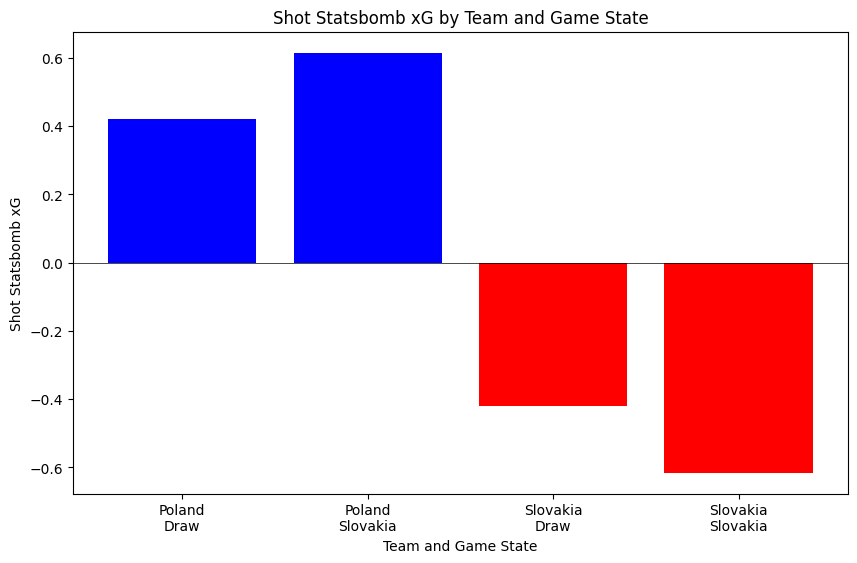

In [77]:
import matplotlib.pyplot as plt

teams = ['Poland', 'Poland', 'Slovakia', 'Slovakia']
game_states = ['Draw', 'Slovakia', 'Draw', 'Slovakia']
xg_values = [0.419802, 0.615249, -0.419802, -0.615249]

plt.figure(figsize=(10, 6))
plt.bar(range(len(teams)), xg_values, color=['blue', 'blue', 'red', 'red'])
plt.xlabel('Team and Game State')
plt.ylabel('Shot Statsbomb xG')
plt.title('Shot Statsbomb xG by Team and Game State')
plt.xticks(range(len(teams)), [f'{t}\n{s}' for t, s in zip(teams, game_states)], rotation=0)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.show()

/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_42153/2609644837.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['team_defending'] = shots['team'].map({home_team: away_team, away_team: home_team})
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_42153/2609644837.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['game_state'] = shots.get('game_state', 'Draw')


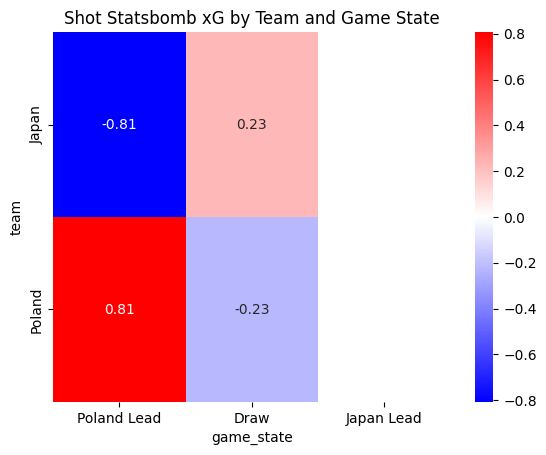

In [283]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

home_team = 'Poland'
away_team = 'Japan'

data = get_gamestate(df, home_team, away_team)
data['xg_per_90'] = data['shot_statsbomb_xg'] / (data['duration'] / 5400)


order = [f"{home_team} Lead", 'Draw', f"{away_team} Lead"]
heatmap_data = data.set_index(['team', 'game_state'])['xg_per_90'].unstack()[order]


sns.heatmap(heatmap_data, 
            annot=np.where(np.isnan(heatmap_data), 'N/A', heatmap_data.round(2).astype(str)),
            fmt='', cmap='bwr', center=0)
plt.title('Shot Statsbomb xG by Team and Game State')
plt.show()

In [184]:
df = sb.lineups(match_id=3857264)['Argentina']
df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,Argentina,[],"[{'position_id': 17, 'position': 'Right Wing',..."
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B..."
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,Argentina,[],"[{'position_id': 23, 'position': 'Center Forwa..."
3,5507,Nicolás Alejandro Tagliafico,Nicolás Tagliafico,3,Argentina,[],"[{'position_id': 6, 'position': 'Left Back', '..."
4,5743,Paulo Bruno Exequiel Dybala,Paulo Dybala,21,Argentina,[],[]
5,6312,Franco Armani,None,1,Argentina,[],[]
6,6377,Ángel Martín Correa,Ángel Correa,15,Argentina,[],[]
7,6694,Gerónimo Rulli,Gero Rulli,12,Argentina,[],[]
8,6909,Damián Emiliano Martínez,Emiliano Martínez,23,Argentina,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
9,7006,Alejandro Darío Gómez,Papu Gómez,17,Argentina,[],[]


In [189]:
df['player_id']

0      2995
1      3090
2      5503
3      5507
4      5743
5      6312
6      6377
7      6694
8      6909
9      7006
10     7161
11     7797
12    11456
13    16308
14    19597
15    20572
16    21081
17    26404
18    27768
19    27886
20    28263
21    28268
22    28637
23    29201
24    29560
25    38718
Name: player_id, dtype: int64

In [191]:
import numpy as np

def generate_player_height(num_players=1):
    return np.random.normal(loc=180, scale=4, size=num_players).clip(172, 195)

player_height = generate_player_height(df.shape[0])

df['player_height'] = player_height 

df

,player_id,player_name,player_nickname,jersey_number,country,cards,positions,player_height
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,Argentina,[],"[{'position_id': 17, 'position': 'Right Wing',...",175.152155
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B...",182.077552
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,Argentina,[],"[{'position_id': 23, 'position': 'Center Forwa...",175.884340
3,5507,Nicolás Alejandro Tagliafico,Nicolás Tagliafico,3,Argentina,[],"[{'position_id': 6, 'position': 'Left Back', '...",177.729662
4,5743,Paulo Bruno Exequiel Dybala,Paulo Dybala,21,Argentina,[],[],176.490691
5,6312,Franco Armani,None,1,Argentina,[],[],182.304510
6,6377,Ángel Martín Correa,Ángel Correa,15,Argentina,[],[],177.831883
7,6694,Gerónimo Rulli,Gero Rulli,12,Argentina,[],[],173.496992
8,6909,Damián Emiliano Martínez,Emiliano Martínez,23,Argentina,[],"[{'position_id': 1, 'position': 'Goalkeeper', ...",182.607276
9,7006,Alejandro Darío Gómez,Papu Gómez,17,Argentina,[],[],184.613611


In [197]:
df = sb.events(7539)

shots_for_set_piece = df[(df['type'] == 'Shot') & (df['play_pattern'].str.contains('From')) & (df['shot_body_part'] == 'Head')][['type', 'team', 'player_id','player', 'play_pattern', 'shot_statsbomb_xg', 'shot_body_part']]

shots_for_set_piece['player_id'] = shots_for_set_piece['player_id'].astype('int64')

shots_for_set_piece

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,type,team,player_id,player,play_pattern,shot_statsbomb_xg,shot_body_part
3417,Shot,Poland,5667,Kamil Grosicki,From Throw In,0.244980,Head
3420,Shot,Senegal,5664,Salif Sané,From Corner,0.142189,Head
3430,Shot,Poland,3637,Grzegorz Krychowiak,From Free Kick,0.365114,Head


In [198]:
df = sb.player_match_stats(3857264)

df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Exception: There is currently no open data for aggregated stats, please provide credentials